# Setup

In [1]:
cd ..

/home/cdauvill/inria/multi_sources


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import yaml
from hydra import compose, initialize
from omegaconf import OmegaConf
from netCDF4 import Dataset
from pathlib import Path
from cartopy.io import DownloadWarning

## Exploring the ERA5 files

In [ ]:
ERA5_ZARR = "/home/cdauvill/scratch/data/era5/weatherbench2/datasets/era5/1959-2023_01_10-6h-64x32_equiangular_conservative.zarr"
era5  = xr.open_zarr(ERA5_ZARR, chunks={"time": 100})
era5

<xarray.Dataset> Size: 175GB
Dimensions:                                           (time: 93544,
                                                       longitude: 64,
                                                       latitude: 32, level: 13)
Coordinates:
  * latitude                                          (latitude) float64 256B ...
  * level                                             (level) int64 104B 50 ....
  * longitude                                         (longitude) float64 512B ...
  * time                                              (time) datetime64[ns] 748kB ...
Data variables: (12/62)
    10m_u_component_of_wind                           (time, longitude, latitude) float32 766MB dask.array<chunksize=(100, 64, 32), meta=np.ndarray>
    10m_v_component_of_wind                           (time, longitude, latitude) float32 766MB dask.array<chunksize=(100, 64, 32), meta=np.ndarray>
    10m_wind_speed                                    (time, longitude, latitude) float32 766MB dask.array<chunksize=(100, 64, 32), meta=np.ndarray>
    2m_dewpoint_temperature                           (time, longitude, latitude) float32 766MB dask.array<chunksize=(100, 64, 32), meta=np.ndarray>
    2m_temperature                                    (time, longitude, latitude) float32 766MB dask.array<chunksize=(100, 64, 32), meta=np.ndarray>
    above_ground                                      (time, level, longitude, latitude) float32 10GB dask.array<chunksize=(100, 13, 64, 32), meta=np.ndarray>
    ...                                                ...
    volumetric_soil_water_layer_1                     (time, longitude, latitude) float32 766MB dask.array<chunksize=(100, 64, 32), meta=np.ndarray>
    volumetric_soil_water_layer_2                     (time, longitude, latitude) float32 766MB dask.array<chunksize=(100, 64, 32), meta=np.ndarray>
    volumetric_soil_water_layer_3                     (time, longitude, latitude) float32 766MB dask.array<chunksize=(100, 64, 32), meta=np.ndarray>
    volumetric_soil_water_layer_4                     (time, longitude, latitude) float32 766MB dask.array<chunksize=(100, 64, 32), meta=np.ndarray>
    vorticity                                         (time, level, longitude, latitude) float32 10GB dask.array<chunksize=(100, 13, 64, 32), meta=np.ndarray>
    wind_speed                                        (time, level, longitude, latitude) float32 10GB dask.array<chunksize=(100, 13, 64, 32), meta=np.ndarray>

Let's display some variables from a single example:

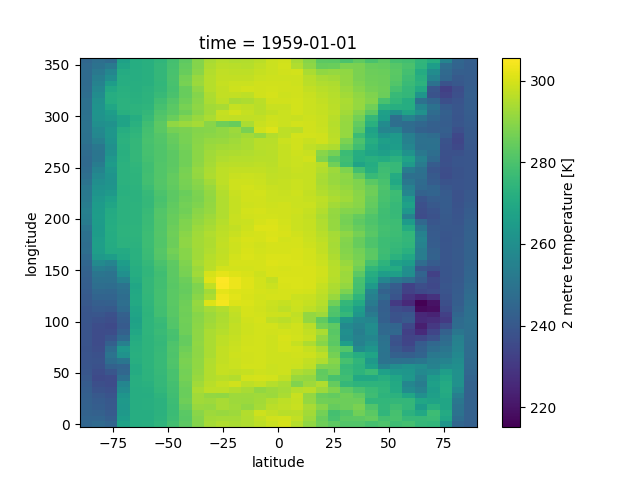

In [10]:
era5.isel(time=0)['2m_temperature'].plot()

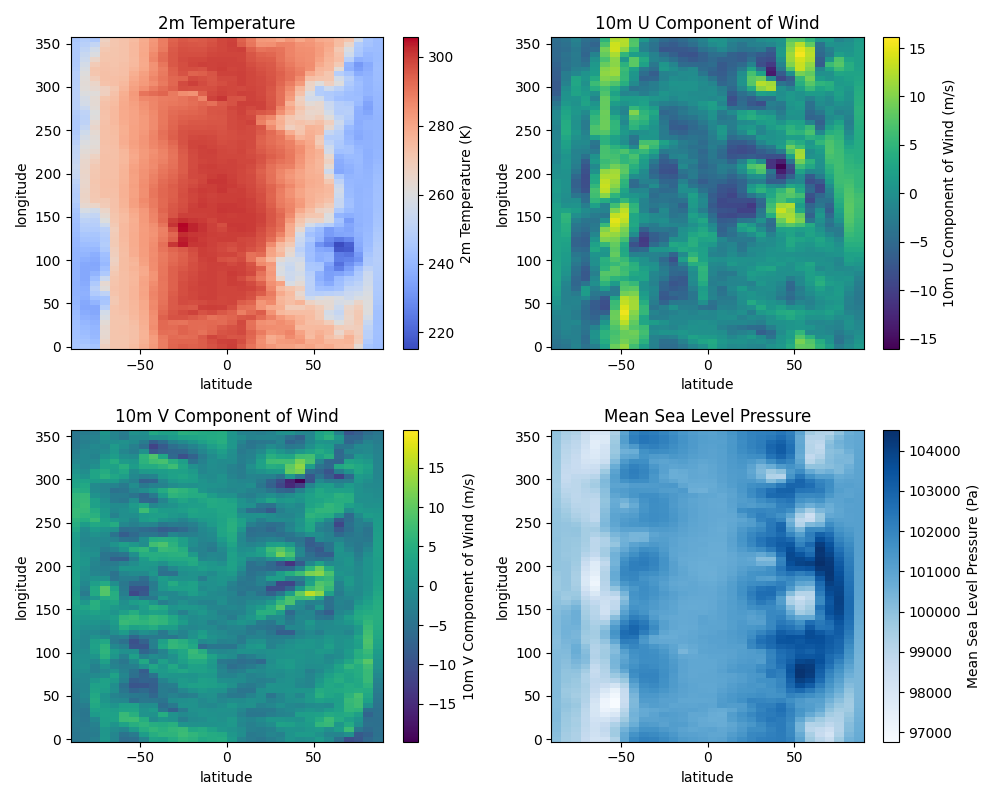

In [14]:
sample = era5.isel(time=0)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sample['2m_temperature'].plot(ax=axes[0, 0], cmap='coolwarm', cbar_kwargs={'label': '2m Temperature (K)'})
axes[0, 0].set_title('2m Temperature')
sample['10m_u_component_of_wind'].plot(ax=axes[0, 1], cmap='viridis', cbar_kwargs={'label': '10m U Component of Wind (m/s)'})
axes[0, 1].set_title('10m U Component of Wind')
sample['10m_v_component_of_wind'].plot(ax=axes[1, 0], cmap='viridis', cbar_kwargs={'label': '10m V Component of Wind (m/s)'})
axes[1, 0].set_title('10m V Component of Wind')
sample['mean_sea_level_pressure'].plot(ax=axes[1, 1], cmap='Blues', cbar_kwargs={'label': 'Mean Sea Level Pressure (Pa)'})
axes[1, 1].set_title('Mean Sea Level Pressure')
plt.tight_layout()
plt.show()